In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory



#### Saving or loading the model as desired.

In [2]:
from tensorflow.keras.models import load_model

In [3]:
#model.save("model_3_0") creates a folder with the same name as the model

In [11]:
#model = load_model("model_3_0") loads a model from this folder

# Table of contents

[o](#Importing-Data) Importing Data 

[o](#CNN-Model) CNN Model 

[o](#Making-Methods) Making Methods 

[o](#Interaction) Interaction 

# Importing Data

In [106]:
def data_generator(image_size, path, preprocess_func=None, split_off_for_val=0.0, split_segment = None):
    this_datagen = ImageDataGenerator(preprocessing_function = preprocess_func, validation_split = split_off_for_val)
    #  note: ImageDataGenerator does not appear to have a parameter for random seeds. Be wary of train/val overlap
    this_generator = this_datagen.flow_from_directory(path, 
                                                     target_size=image_size,
                                                     subset = split_segment, #  None|'training'|'validation'
                                                     color_mode='rgb',
                                                     batch_size=80,
                                                     class_mode='categorical',
                                                     shuffle=True)
    return this_generator

The training-validation split here has split nothing out of the train data, for some reason.
It has, however, functioned fine when sampling the validation data.
For now, the validation split will not be used.

In [107]:
train_data = data_generator(image_size = [80,80],
                            path = 'data/grassnoted/asl_alphabet_train',
                            split_off_for_val = .3,
                            split_segment = 'training'
                           )
train_data


Found 60900 images belonging to 29 classes.


In [108]:
# validation_data = data_generator(image_size = [80,80],
#                                 path = 'data/grassnoted/asl_alphabet_train',
#                                 split_off_for_val = .3,
#                                 split_segment = 'validation')
# validation_data

In [109]:
test_data = data_generator([80,80], 'data/grassnoted/asl_alphabet_test_folders/')
test_data

Found 29 images belonging to 29 classes.


In [110]:
label_map = train_data.class_indices
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

In [156]:
label_map = train_data.class_indices
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

The classes for both data sets are the same.

# CNN Model

## model_3
This will be similar to model_2, but will make sure to use the same image preprocessing (datagen)for train, validation, and test data.

### creating model

In [112]:
experienced_model = MobileNetV2(weights='imagenet', include_top=False, input_shape = (80,80,3))
#input shape minimum is 32x32
#this warning is all bark and no bite

In [113]:
# Assign the output of this base_model to a variable:
base_model_out = experienced_model.output



# Add a pooling layer:
base_model_out = GlobalAveragePooling2D()(base_model_out)

# Add 3 dense layers so that the model can learn aspects of our new dataset 
# and classify for better results.
base_model_out = Dense(243, activation='relu')(base_model_out) 
base_model_out = Dense(243, activation='relu')(base_model_out)
base_model_out = Dropout(.2, input_shape=(243,))(base_model_out, training=True)
base_model_out = Dense(81, activation='relu')(base_model_out)

# Add a final layer with num_classes == 29 neurons, one for each class in our dataset 
# using a softmabase_model_out activation function:
preds = Dense(29, activation='softmax')(base_model_out)




# Instantiate our final model, where we specify what are the inputs and 
# the outputs will look like
model = Model(inputs = experienced_model.input, 
              outputs = preds)

We can find the number of nodes in the topless MobileNetV2 by looking at the index of the pooling layer. These should be locked in order to preserve their weights.

In [114]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_8
1 Conv1
2 bn_Conv1
3 Conv1_relu
4 expanded_conv_depthwise
5 expanded_conv_depthwise_BN
6 expanded_conv_depthwise_relu
7 expanded_conv_project
8 expanded_conv_project_BN
9 block_1_expand
10 block_1_expand_BN
11 block_1_expand_relu
12 block_1_pad
13 block_1_depthwise
14 block_1_depthwise_BN
15 block_1_depthwise_relu
16 block_1_project
17 block_1_project_BN
18 block_2_expand
19 block_2_expand_BN
20 block_2_expand_relu
21 block_2_depthwise
22 block_2_depthwise_BN
23 block_2_depthwise_relu
24 block_2_project
25 block_2_project_BN
26 block_2_add
27 block_3_expand
28 block_3_expand_BN
29 block_3_expand_relu
30 block_3_pad
31 block_3_depthwise
32 block_3_depthwise_BN
33 block_3_depthwise_relu
34 block_3_project
35 block_3_project_BN
36 block_4_expand
37 block_4_expand_BN
38 block_4_expand_relu
39 block_4_depthwise
40 block_4_depthwise_BN
41 block_4_depthwise_relu
42 block_4_project
43 block_4_project_BN
44 block_4_add
45 block_5_expand
46 block_5_expand_BN
47 block_5_expand_relu
48 b

!code from class notebook

In [115]:
for layer in model.layers[:154]:
    layer.trainable=False
    
for layer in model.layers[154:]:
    print(layer.name)
    layer.trainable=True

global_average_pooling2d_6
dense_24
dense_25
dropout_6
dense_26
dense_27


!code from class notebook

In [116]:
step_size_train = train_data.n//train_data.batch_size + 1

# 'train_generator.n' = 182 (number of datapoints; i.e. images)
# 'train_generator.batch_size' = 32 (size of batches previously passed in)
# 'step_size_train' = 6 (step size; needs to be int)
step_size_train

762

### compiling model

In [117]:
model.compile(loss = 'categorical_crossentropy', #loss function
                  optimizer = 'Adam',
                  metrics = ['accuracy']) #value to maximize

### fitting model

In [118]:
model.fit_generator(train_data, steps_per_epoch = step_size_train, epochs = 6, verbose = 1)

Epoch 1/6
762/762 [==============================] - 185s 237ms/step - loss: 2.3186 - accuracy: 0.3185
Epoch 2/6
762/762 [==============================] - 174s 228ms/step - loss: 0.9612 - accuracy: 0.6821
Epoch 3/6
762/762 [==============================] - 174s 228ms/step - loss: 0.7372 - accuracy: 0.7528
Epoch 4/6
762/762 [==============================] - 177s 232ms/step - loss: 0.6042 - accuracy: 0.7953
Epoch 5/6
762/762 [==============================] - 177s 232ms/step - loss: 0.5474 - accuracy: 0.8140
Epoch 6/6
762/762 [==============================] - 182s 239ms/step - loss: 0.4980 - accuracy: 0.8276


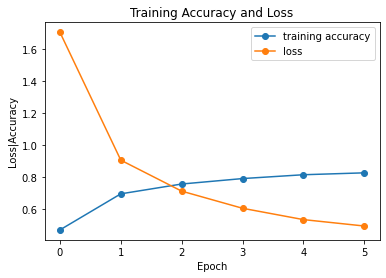

In [119]:
plt.figure()
plt.plot(model.history.history['accuracy'], marker='o', label='training accuracy')
plt.plot(model.history.history['loss'], marker='o', label='loss')
plt.title('Training Accuracy and Loss')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.show()

# Making Methods

#### Predictions with Iterators

In [5]:
#inputs a keras model and the filepath for a photo of a hand relative to the local directory
#photo must be RGB
#returns an array that sums to 1 with prediction weights for each class the model can detect.
def load_and_predict_photo(model, path):
    #loading photo
    photo = image.load_img(path,
                           grayscale=False,
                           color_mode="rgb",
                           target_size=model.input_shape[1:3],
                           interpolation="nearest")
    input_arr = image.img_to_array(photo)
    input_arr = np.array([input_arr])  #this model predicts based on batches. Making solo batch.
    predictions = model.predict(input_arr)
    return predictions

In [6]:
def chart_predictions(predictions, labels):
    predictions = np.reshape(predictions, 29)
    plt.figure(figsize=[26,8])
    labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']#temportary hardcoding
    plt.bar(height = predictions, x = labels)
    plt.tight_layout()
    plt.show()
    pass

In [7]:
labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']

# Interaction

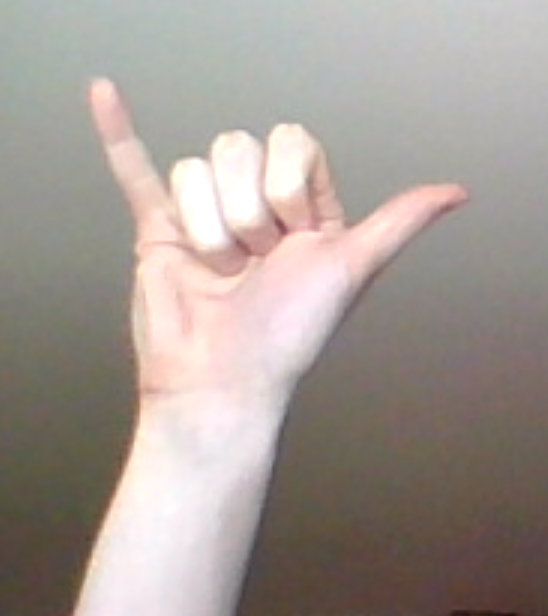

In [8]:
my_a = image.load_img('data/self_photos/Capture1.png',
               grayscale=False,
               color_mode="rgb",
               target_size=None,
               interpolation="nearest")
my_a

In [17]:
%%time
probs = load_and_predict_photo(model, 'data/self_photos/Capture1.png')

#index = probs.argmax()
#index

Wall time: 69 ms


<AxesSubplot:>

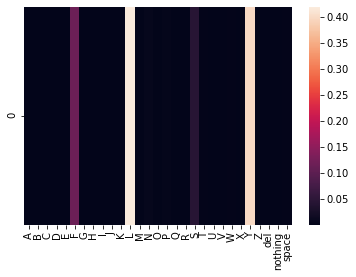

In [18]:
sns.heatmap(probs, xticklabels = labels)

In [19]:
%%time
probs = load_and_predict_photo(model, 'data/self_photos/Capture1.png')

#index = probs.argmax()
#index

Wall time: 62.5 ms


<AxesSubplot:>

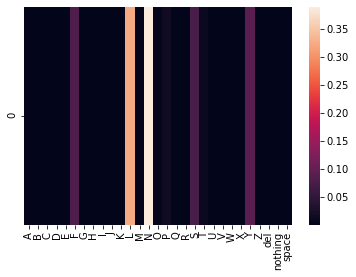

In [20]:
sns.heatmap(probs, xticklabels = labels)

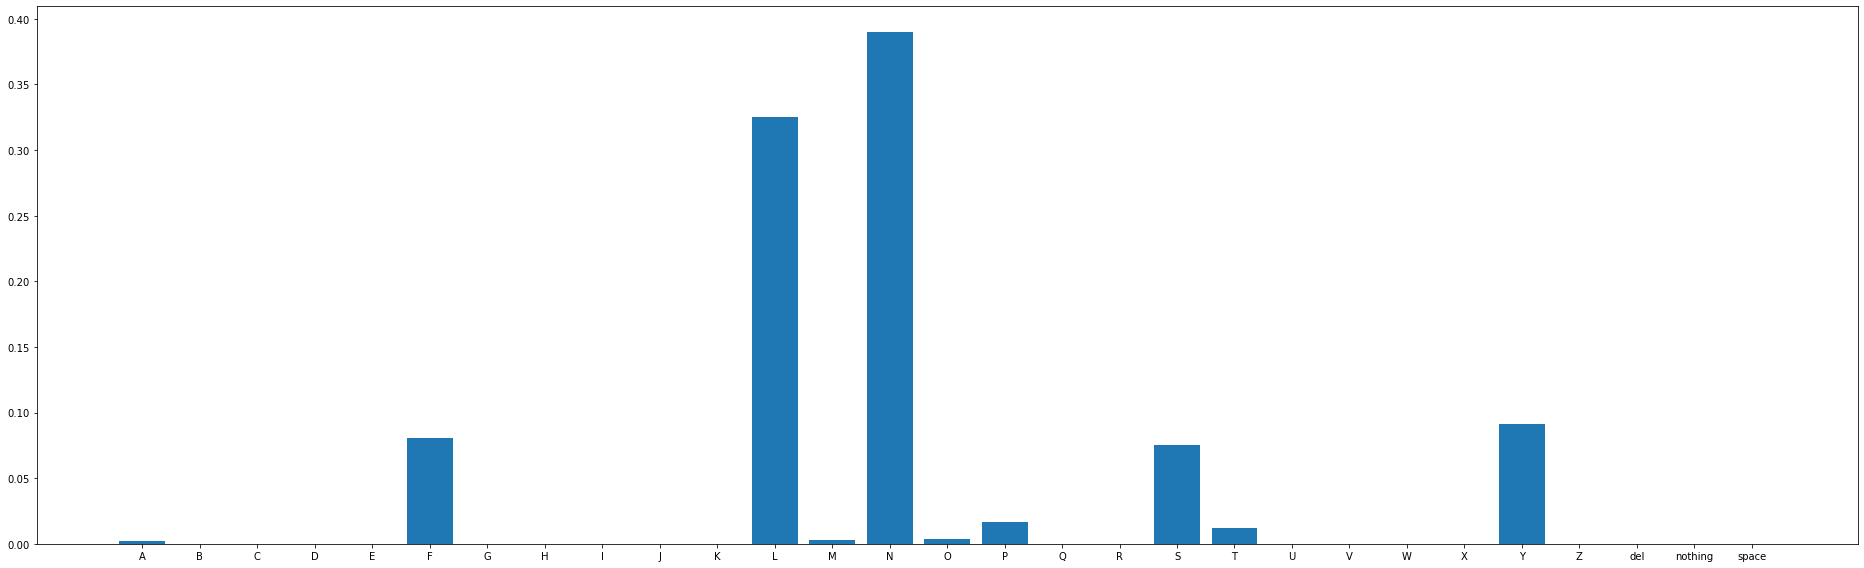

In [21]:
chart_predictions(labels = labels, predictions = probs)

In [26]:
%%time
probs = load_and_predict_photo(model, 'data/self_photos/Capture1.png')

#index = probs.argmax()
#index

Wall time: 69 ms


<AxesSubplot:>

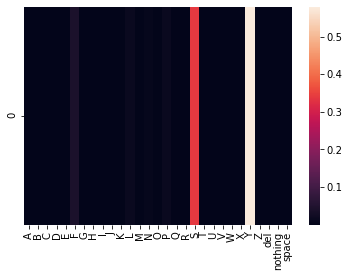

In [27]:
sns.heatmap(probs, xticklabels = labels)

As the model's predictions seem to vary with repetition, it may be useful to apply ensemble voting.

As hand distance and skin tone are correlated in this dataset, it may be helpful to do some kind of size randomization when generating future data for more general training.